## House Selling in King County

## Overview

This project thoroughly assess the realtionship between house price and differnt factors that affect home price. Descriptive analysis and multiple linear regrsssion model was conducted to assess the corelation of these factors including but not limited to condtion of the house, square feet of the living room, number of bedrooms and bathrooms were assessed.
Understadning of these factors by potenial home home buyers will help them to get relevant inforamtion in regard to their budget and enhance decision making capability in the process of purchaing the houses. 


## Business Problem

Seattle, Washington area became one of the center of trade and technology following the establishment of giant companies like Amazon and Microsoft. Due to the influx of people moving to Seattle, the housing demand in and around King County has also increased. However,most people do not have enough inforamtion about the housing pricne in the area.In ordert to assist home buyers,it is found to be important to give them useful information about the various factors that affect the housing prince.
The important dataset were collected form King County assessor website.

## Data Understanding

The King County assessor website has an important set of inforamtion realted to housing.Certain types of data, for instacne includes age of houses, number of bedrooms, condition of the house, and grade of the houses has a  numeric, categrocial andcoded types of data respectively.The price is considered as a target variable to see hoe home price is affected by other varables.

## Data Exploration 

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Import Dataset

In [262]:
#Import dataet 

df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [233]:
# Get inforamtion about the data and visisually inspect it

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Data Preparation

## Data Cleaning

Columns without value or with missing value were identified and dropped.
The condition of houses has a coded vaue.For ease of work, I created a  new dictionary that incorporates each parameters in the 'condtion', with each key and value. Then I replaced the original condition with the new 'condition" with numeric vaue.  
The column, 'grade' has object values containing strings and numbers.Since I am considering the number of value for my upcoming model, I created a new column called 'grade_int' which contains only the number value. 



In [235]:
# get the description of the column 'grade'

df['grade'].describe()

count         21597
unique           11
top       7 Average
freq           8974
Name: grade, dtype: object

In [236]:
# get the unique values in the column'grade'
df['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [263]:
# create a new column as 'grade_int' that contains only the number value.

df['grade_int'] = df['grade'].str[:2].astype('int64')

In [264]:
# See presence of the new column named 'grade_int'

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_int
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,7
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,7
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,6
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,7
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,8


In [238]:
# identify columns with missing value

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
grade_int           0
dtype: int64

In [265]:
#Drop the columns where at least one element is missing.
df.dropna(axis='columns', inplace=True)

In [266]:
# check columns to make sure those missing value are dropped.

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,grade_int
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,7
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,7
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,6
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,7
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,8


In [241]:
# visually inspect the overall inforamtion

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  grade_

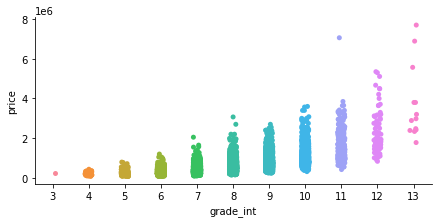

In [243]:
# use catplot to show the association between the house price and grade

sns.catplot(x="grade_int", y="price", data=df, height=3, aspect=2)

As the score for the house grade increases, the prices also increases, which shows a positive relationship.

In [244]:
# look the desctiption of the year where houses were built

df['yr_built'].describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

<AxesSubplot:xlabel='yr_built'>

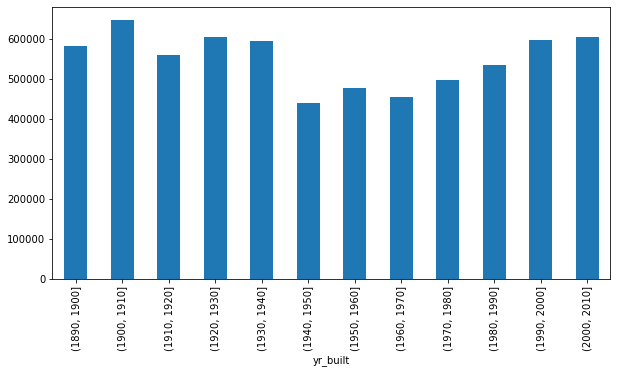

In [245]:
# develop bar graph to see the year built and price

bins = pd.cut(df['yr_built'], [ 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
df.groupby(bins)['price'].agg('mean').plot.bar(figsize=(10, 5))

Old homes are the most expensive ones.

In [144]:
# look the description of the column 'condition'

df['condition'].describe

<bound method NDFrame.describe of 0          Average
1          Average
2          Average
3        Very Good
4          Average
           ...    
21592      Average
21593      Average
21594      Average
21595      Average
21596      Average
Name: condition, Length: 21597, dtype: object>

In [145]:
# look the unique values in 'condition'

df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [19]:
Poor='1'
print(Poor)

Fair='2'
print(Fair)

Average ='3'
print(Average)

Good='4'
print(Good)

Very_Good= '5'
print(Very_Good)

1
2
3
4
5


The condition of houses in King County is coded between 1-5 as Building Condition. 
The table data, however does not show the coded values,instead the actual condition 
as Fair, Average, Good and Very Good.Since I am using the numeric variables for my model,
I have to transform these object variables in to integer type. 
For this, I created a dictonary for the column condition, with respective keys and  values. 
Using the .replace() function, I changed the column values to integers.

In [53]:
condition= {'Poor':1,'Fair':2,'Average':3,'Good':4,'Very Good':5}
print(condition)

{'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}


In [146]:
# see if the numeric values are in the 'condition'dataframe
df['condition'] 

0          Average
1          Average
2          Average
3        Very Good
4          Average
           ...    
21592      Average
21593      Average
21594      Average
21595      Average
21596      Average
Name: condition, Length: 21597, dtype: object

In [147]:
# replace the old 'condition' with the new 'condition'

df.replace({'condition':condition}, inplace=True)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  grade_

In [148]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,3,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,3,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,3,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,5,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,3,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


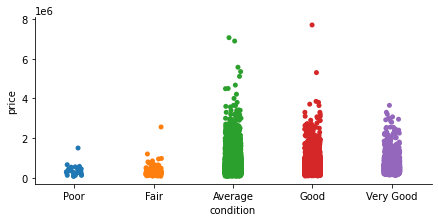

In [92]:
# see the assocation between house condition versus price. 

sns.catplot(x="condition", y="price", data=df, order=['Poor','Fair','Average','Good','Very Good'],height=3, aspect=2)

In [94]:
#explore object columns

obj_cols = [c for c in df.columns if df[c].dtype == 'object']
df[obj_cols].describe()

,date,condition,grade,sqft_basement
count,21597,21597,21597,21597
unique,372,5,11,304
top,6/23/2014,Average,7 Average,0.0
freq,142,14020,8974,12826


## TRAIN AND TEST SPLIT

In [98]:
#create Train and Test Datasets( x and y )

x= df.drop(columns=['id','price'])
y= df['price']

In [99]:
#train test-split- reserving 25% of the data

x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [100]:
#exploring the describes across my train and test set to see if they are equivalent
print ("X_Train:")
display(x_train[obj_cols].describe())
print("X_Test:")
display(x_test[obj_cols].describe())


X_Train:


,condition
count,16197.000000
mean,3.410385
std,0.650777
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


X_Test:


,condition
count,5400.000000
mean,3.408148
std,0.649909
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


The description among both  train and test set are almost similiar/ equivalent.

## Visual Data Exploration

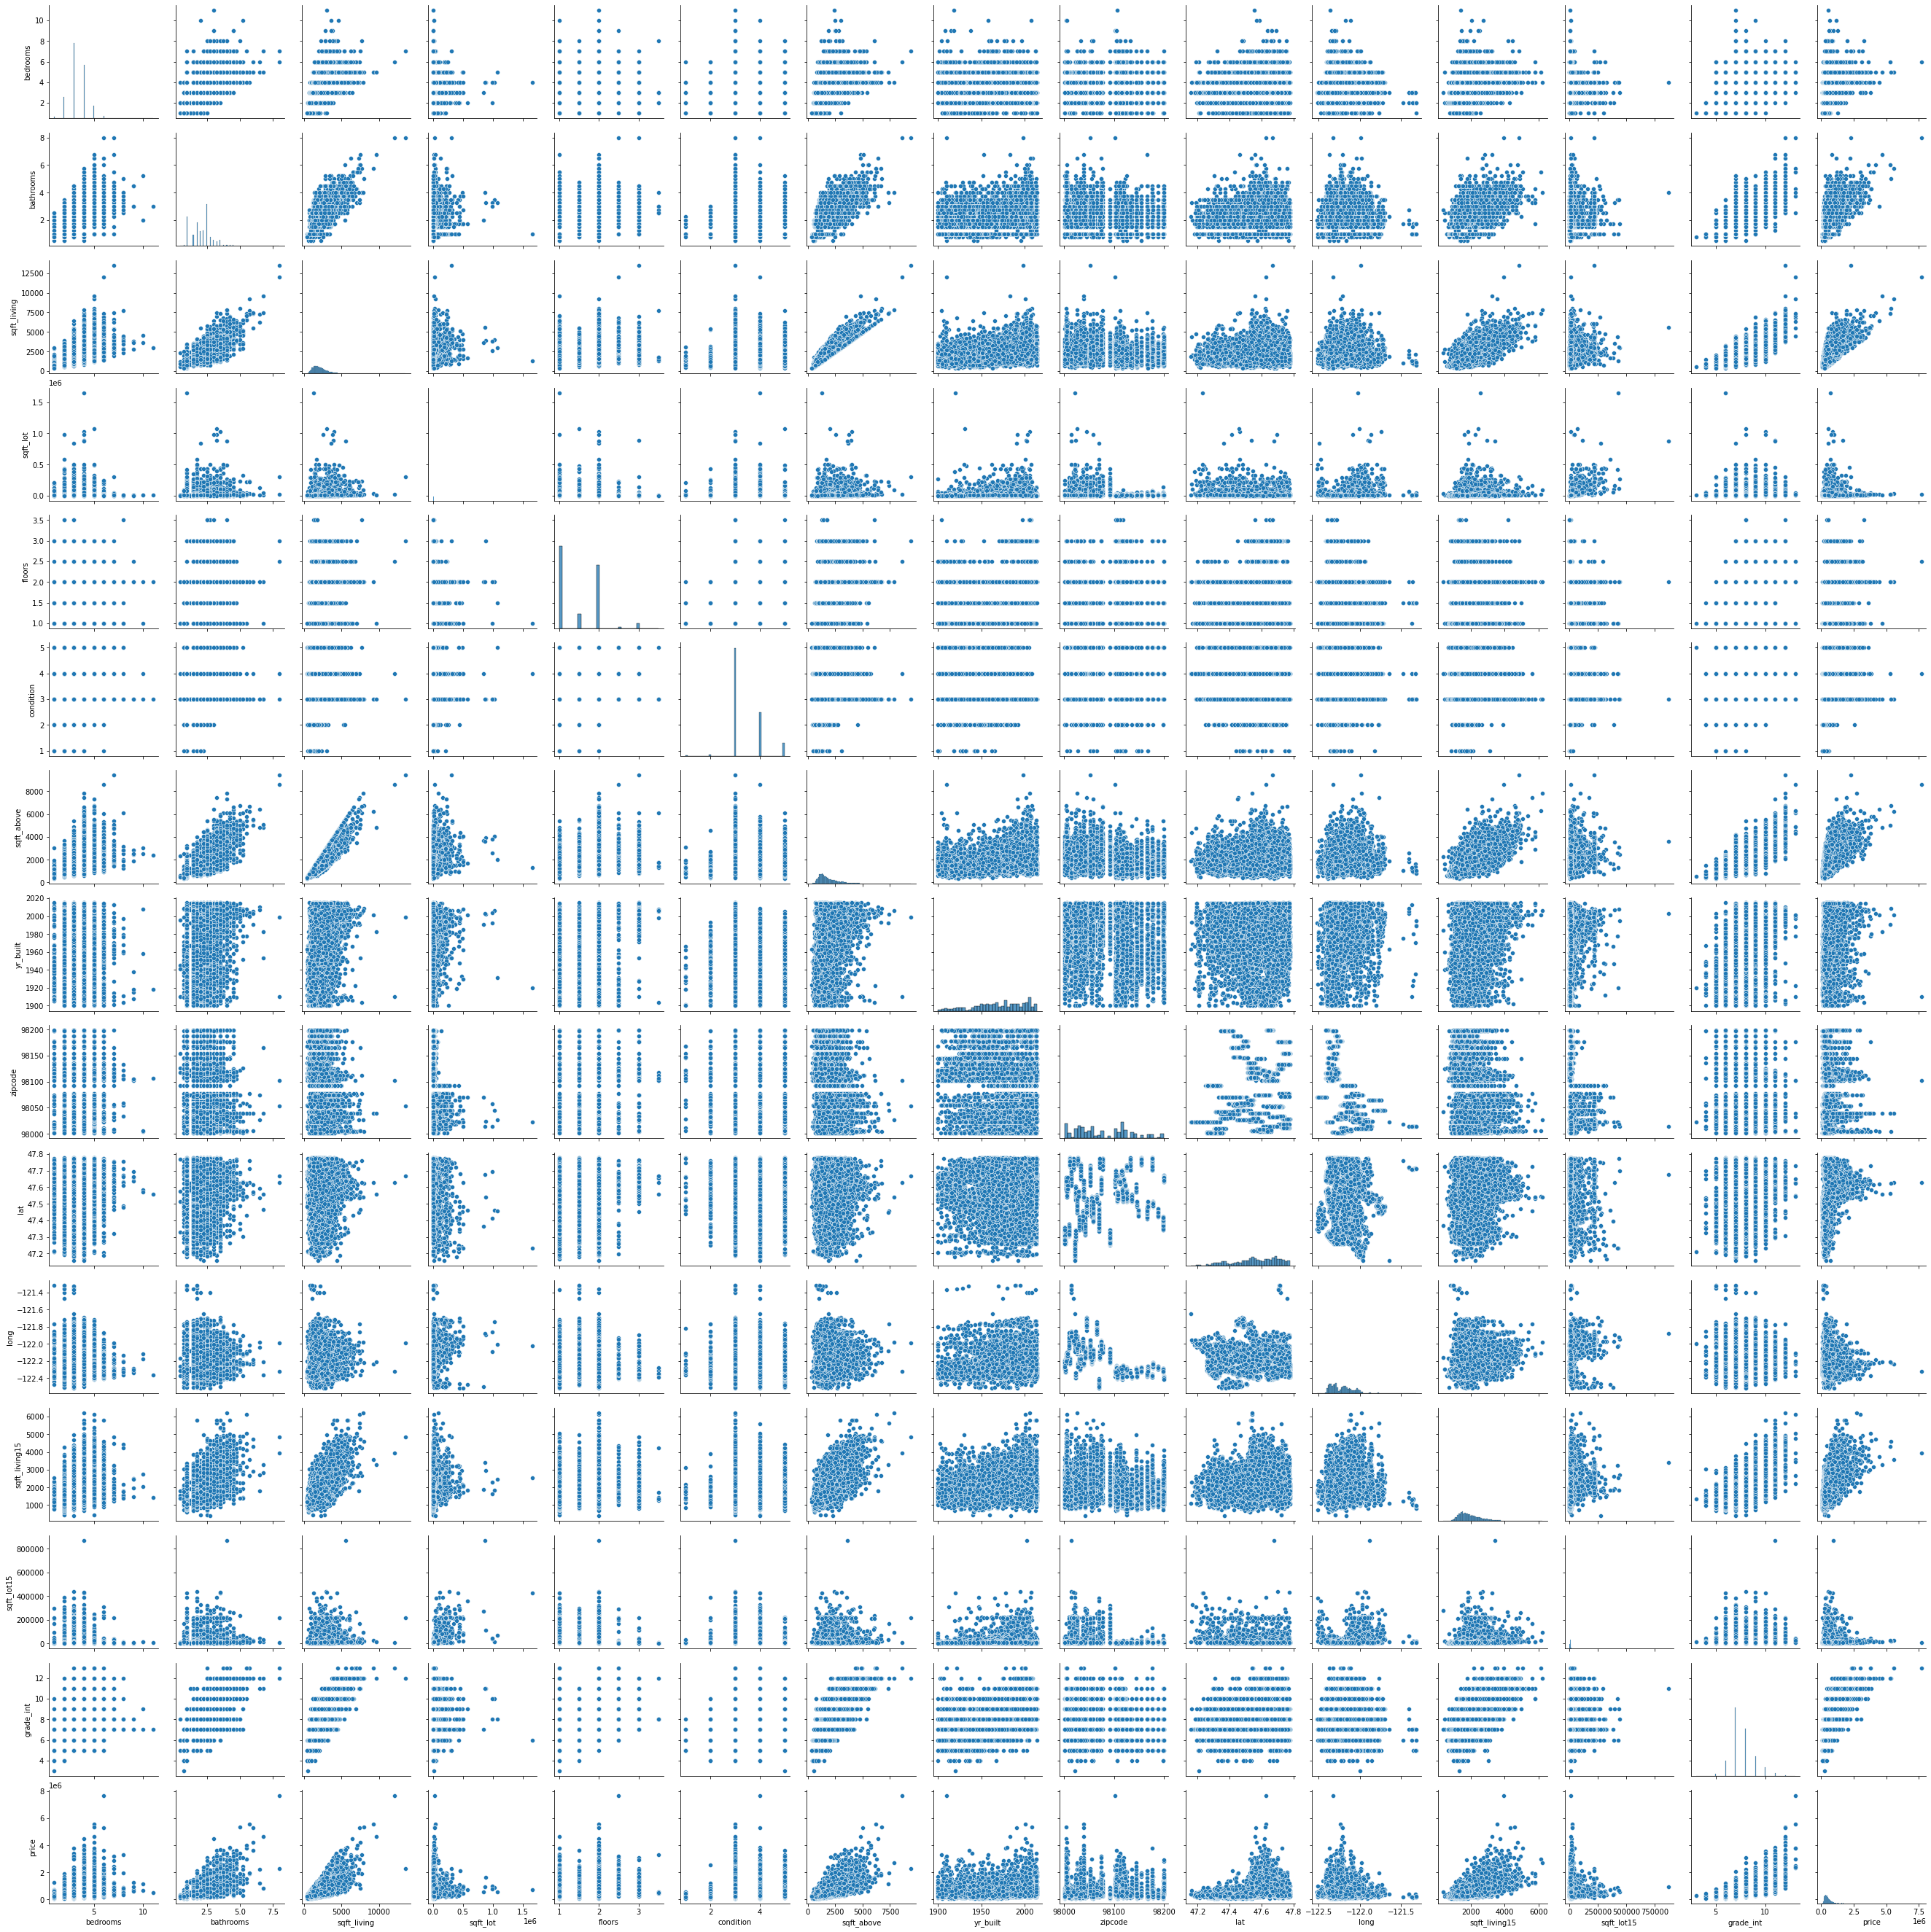

In [101]:
# create a train df
train_df = pd.concat([x_train, y_train], axis=1)

# look at the pairplot acrosos whole dataframe
sns.pairplot(train_df);

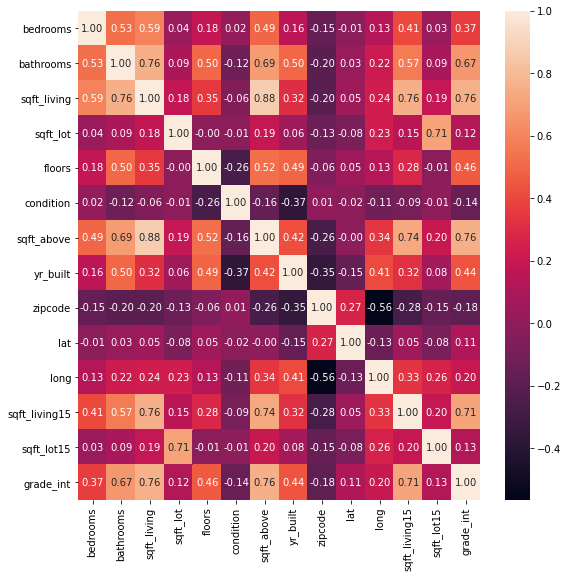

In [103]:
#heatmap of correlations across all dataframe
plt.figure(figsize=(9,9))
sns.heatmap(x_train.corr(), annot= True, fmt='.2f');

The above heatmap shows the correlation across all features. Pairs with the value closer to zero will allow us to use them together in the multiple linear regression model without expecting multcolinarlity , which is known to intefer the model analysis and compromize the value of the model. 

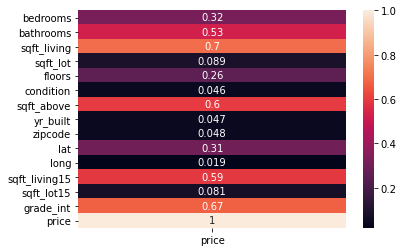

In [32]:
#exploring the corelations using exact vaues with price
sns.heatmap(abs(train_df.corr())[['price']], annot=True);

The above heatmap is showing the correlation between the price and all of the features in the dataframe.
It is indicated that sqft_living has the highest correaltion with price.

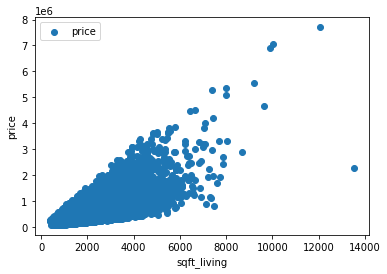

In [251]:
    # plot and show the correlation between sqft_living andd price using the scatter plot.
    
    plt.scatter('sqft_living','price', data= df)
    plt.xlabel('sqft_living')
    plt.ylabel('price')
    plt.legend()
    plt.show()    

<AxesSubplot:>

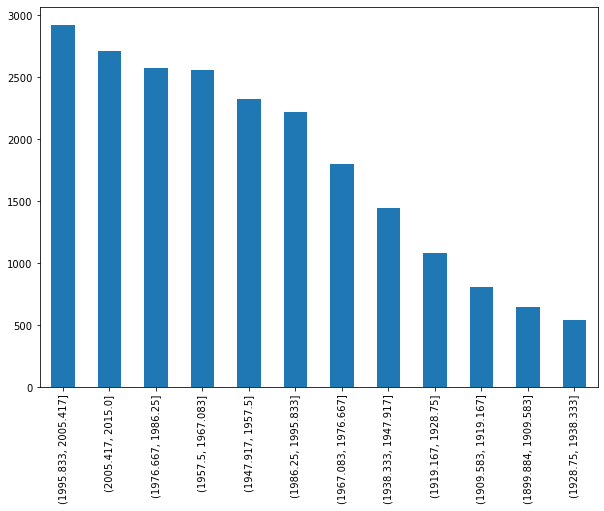

In [246]:
#Frequency of  Age of homes by price,
df['yr_built'].value_counts(bins=12).plot.bar(figsize=(10, 7))

sqft_living wiht the highest score of 0.7 is highly correlated wit the price.

# Model Results

## Baseline Model

In [116]:
#Determine the baseline prediction 

train_target_mean= y_train.mean()
train_target_mean

541284.4615669568

Our baseline prediction shows every home has a price of  below or equal to 541284.4615669568.

In [105]:
baseline_preds = [train_target_mean] * len(y_train)
baseline_preds



[541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,
 541284.4615669568,


In [38]:
# establish the baseline prediction

baseline_train_preds = [train_target_mean] * len(y_train)
baseline_test_preds = [train_target_mean] * len(y_test)

In [117]:
print(f"TrainR2:{r2_score(y_train,baseline_train_preds)}")
print(f"TestR2:{r2_score(y_test,baseline_test_preds)}")
print(f"Train RMSE= {mean_squared_error(y_train,baseline_train_preds, squared= False)}")
print(f"Test RMSE= {mean_squared_error(y_test,baseline_test_preds, squared= False)}")

TrainR2:0.0
TestR2:-0.0001137788699303588
Train RMSE= 366333.4407520335
Test RMSE= 370425.86427991075


The RMSE value shown above for both train and test are almost equal and lower from the baseline price estimated.

# OLS Regrsssion Model

## First Simple Model

Among the variables sqft_living was selected mainly because it had one of the highest correlation with the target varable-home price.

In [40]:
fsm_x_train=x_train[['sqft_living']]

In [41]:
fsm_x_test=x_test[['sqft_living']]

In [107]:
#fitting the model to the traiing data uinsg the stats model library.

fsm= sm.OLS(y_train, sm.add_constant(fsm_x_train)).fit()

In [108]:
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.559e+04
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:12:07   Log-Likelihood:            -2.2503e+05
No. Observations:               16197   AIC:                         4.501e+05
Df Residuals:                   16195   BIC:                         4.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.099e+04   5095.343     -8.044      0.000    -5.1e+04    -3.1e+04
sqft_living   279.4423      2.238    124.878      0.000     275.056     283.828
==============================================================================
Omnibus:                    10430.239   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           291279.150
Skew:                           2.656   Prob(JB):                         0.00
Kurtosis:                      23.084   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can predict housing prices in this area with about 49 % greater accuracy than the baseline model.For every unit of sqft_living, there is a price increase in amount of $ 279.4423.

## Multiple Linear Regression Model


In [274]:
# develop multiple linear regression model using multiple features in the dataframe
int_x_train = x_train[['sqft_living','grade_int','yr_built','bedrooms','bathrooms','condition','floors','sqft_lot']]
int_x_test = x_test[['sqft_living','grade_int','yr_built','bedrooms','bathrooms','condition','floors','sqft_lot']]

In [275]:
print(int_x_train)

       sqft_living  grade_int  yr_built  bedrooms  bathrooms  condition  \
6405          1880          8      1993         3       2.50          3   
937           2020          7      1994         3       2.50          3   
19076         4720          9      1975         5       4.00          5   
15201         1430          7      1949         2       2.00          4   
13083         2270          8      1980         3       2.25          4   
...            ...        ...       ...       ...        ...        ...   
11964         2230          7      2004         3       2.50          3   
21575         2770          8      2014         4       2.75          3   
5390          1530          6      1976         4       1.50          4   
860            380          5      1963         1       0.75          3   
15795         2755          8      2001         4       2.50          3   

       floors  sqft_lot  
6405      2.0      4499  
937       1.0      6564  
19076     2.0    4935

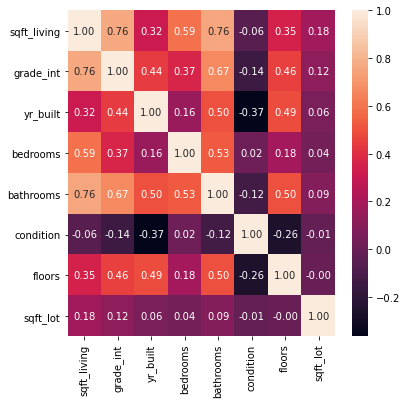

In [276]:
#heatmap of correlations across all dataframe

plt.figure(figsize=(6,6))
sns.heatmap(int_x_train.corr(), annot= True, fmt='.2f');

 Mulitcolinearlity between each varaibles is observed.

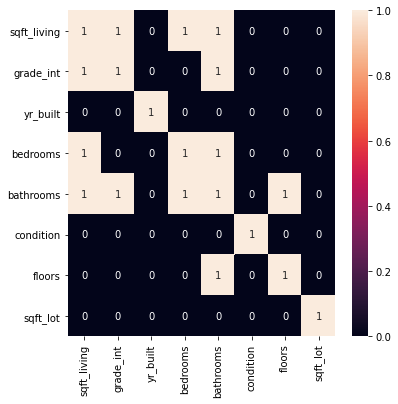

In [113]:
plt.figure(figsize=(6,6))
sns.heatmap(int_x_train.corr()> .5, annot= True );

Bathrooom happens to be multicolinear with other features.

In [277]:
#fitting the model to the training data uinsg the stats model library.

int_m= sm.OLS(y_train, sm.add_constant(int_x_train)).fit()

In [278]:
int_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     3342.
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:26:21   Log-Likelihood:            -2.2259e+05
No. Observations:               16197   AIC:                         4.452e+05
Df Residuals:                   16188   BIC:                         4.453e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.075e+06   1.54e+05     45.997      0.000    6.77e+06    7.38e+06
sqft_living   183.4766      3.958     46.353      0.000     175.718     191.235
grade_int     1.34e+05   2563.735     52.284      0.000    1.29e+05    1.39e+05
yr_built    -4055.3828     78.964    -51.358      0.000   -4210.160   -3900.605
bedrooms    -5.055e+04   2523.721    -20.028      0.000   -5.55e+04   -4.56e+04
bathrooms    5.509e+04   4128.023     13.345      0.000     4.7e+04    6.32e+04
condition    2.219e+04   2958.221      7.500      0.000    1.64e+04     2.8e+04
floors       2.245e+04   4110.630      5.462      0.000    1.44e+04    3.05e+04
sqft_lot       -0.2948      0.045     -6.624      0.000      -0.382      -0.208
==============================================================================
Omnibus:                    11954.260   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           570189.113
Skew:                           3.061   Prob(JB):                         0.00
Kurtosis:                      31.415   Cond. No.                     3.78e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Every year when a home is built, ther is a -4055.3828 decrease in price. We can deduce that newr houses are cheapr than older houses.  

In [257]:
## establish the  prediction value 

int_m_train_preds=int_m.predict(sm.add_constant(int_x_train))
int_m_test_preds= int_m.predict(sm.add_constant(int_x_test))

In [258]:
print(f"TrainR2:{r2_score(y_train,int_m_train_preds)}")
print(f"TestR2:{r2_score(y_test,int_m_test_preds)}")
print(f"Train RMSE= {mean_squared_error(y_train,int_m_train_preds, squared= False)}")
print(f"Test RMSE= {mean_squared_error(y_test,int_m_test_preds, squared= False)}")

TrainR2:0.6228687578070675
TestR2:0.602767056645106
Train RMSE= 224969.07406750013
Test RMSE= 233452.87496442854


In [151]:
# Thrid model excluding the variable bathroom  

Model_final_train = x_train[['sqft_living','grade_int','yr_built','bedrooms','condition','floors','sqft_lot']]
Model_final_test= x_test [['sqft_living','grade_int','yr_built','bedrooms','condition','floors','sqft_lot']]

In [152]:
print(Model_final_train)

       sqft_living  grade_int  yr_built  bedrooms  condition  floors  sqft_lot
6405          1880          8      1993         3          3     2.0      4499
937           2020          7      1994         3          3     1.0      6564
19076         4720          9      1975         5          5     2.0    493534
15201         1430          7      1949         2          4     1.0      3880
13083         2270          8      1980         3          4     1.0     32112
...            ...        ...       ...       ...        ...     ...       ...
11964         2230          7      2004         3          3     2.0      5800
21575         2770          8      2014         4          3     2.0      3852
5390          1530          6      1976         4          4     1.0      9000
860            380          5      1963         1          3     1.0     15000
15795         2755          8      2001         4          3     2.0     11612

[16197 rows x 7 columns]


In [163]:
#fitting the model to the model final train data uinsg the stats model library.

Model_final= sm.OLS(y_train, sm.add_constant(Model_final_train)).fit()

In [165]:
#Model evaluation 

def evaluate(y_tr, tr_preds,y_te,te_preds):

    '''
y_train - array like, actual values for 'price'for my train dataset
train_preds- array like, predicted values for 'price'for my train dataset.


y_test-array like actual values for my test dataset.
test_preds- array like predicted values for 'price'for my test dataset.

OutputS 
None
    '''
    print(f"TrainR2: {r2_score(y_tr,tr_preds)}")
    print(f"TestR2: {r2_score(y_te,te_preds)}")

    print("***")
    print(f"Train RMSE= {mean_squared_error(y_tr,tr_preds, squared= False)}" )
    print(f"Test RMSE= {mean_squared_error(y_te,te_preds, squared= False)}" )

    print("***")
    print(f"Train MAE: {mean_absolute_error(y_tr,tr_preds)}")
    print(f"Test MAE: {mean_absolute_error(y_te,te_preds)}")
      
    #Calculate our residuals 

    train_residuals= y_tr - tr_preds
    test_residuals = y_te - te_preds

    #Scatter plot our residuals

    plt.scatter(tr_preds,train_residuals, label= 'Train')
    plt.scatter(te_preds,test_residuals, label= 'Test')

    plt.axhline(y=0, color= 'red', label= '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    plt.show()
    
    # Histogram of residuals
    plt.hist(train_residuals, label='Train')
    plt.hist(test_residuals, label='Test')

    plt.show()
    
        # QQ plots are generally great tools for checking for normality.

    sm.qqplot(train_residuals, line = 'r');

In [164]:
Model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     3753.
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:26:51   Log-Likelihood:            -2.2268e+05
No. Observations:               16197   AIC:                         4.454e+05
Df Residuals:                   16189   BIC:                         4.454e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.444e+06   1.47e+05     43.787      0.000    6.16e+06    6.73e+06
sqft_living   206.8896      3.568     57.992      0.000     199.897     213.882
grade_int    1.362e+05   2572.668     52.935      0.000    1.31e+05    1.41e+05
yr_built    -3734.4202     75.622    -49.383      0.000   -3882.648   -3586.192
bedrooms    -4.406e+04   2489.980    -17.694      0.000   -4.89e+04   -3.92e+04
condition     2.46e+04   2968.795      8.286      0.000    1.88e+04    3.04e+04
floors       3.587e+04   4007.454      8.952      0.000     2.8e+04    4.37e+04
sqft_lot       -0.3232      0.045     -7.230      0.000      -0.411      -0.236
==============================================================================
Omnibus:                    11988.418   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           579156.298
Skew:                           3.071   Prob(JB):                         0.00
Kurtosis:                      31.643   Cond. No.                     3.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Sqfit_living is highly correlated with the price of houses. This can be further explained as  for very unit of sqfit _living, there is an $206.8896	increase in the price of houses.  

## Scaling Our Numeric Data

In [247]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

scaler= StandardScaler()
scaler.fit(Model_final_train)

StandardScaler()

In [248]:
# establish model final for train and test 

Model_final_train_scaled = scaler.transform(Model_final_train)
Model_final_test_scaled  = scaler.transform(Model_final_test)

In [268]:
# #fitting the scaled model to the model final train scaled data 

Model_Scale_Final = sm.OLS(y_train, sm.add_constant(Model_final_train_scaled)).fit()

In [281]:
Model_Scale_Final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     3753.
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:33:51   Log-Likelihood:            -2.2268e+05
No. Observations:               16197   AIC:                         4.454e+05
Df Residuals:                   16189   BIC:                         4.454e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.413e+05   1777.824    304.465      0.000    5.38e+05    5.45e+05
x1            1.9e+05   3275.656     57.992      0.000    1.84e+05    1.96e+05
x2          1.592e+05   3008.069     52.935      0.000    1.53e+05    1.65e+05
x3         -1.095e+05   2217.580    -49.383      0.000   -1.14e+05   -1.05e+05
x4         -3.991e+04   2255.731    -17.694      0.000   -4.43e+04   -3.55e+04
x5          1.601e+04   1931.963      8.286      0.000    1.22e+04    1.98e+04
x6          1.939e+04   2165.859      8.952      0.000    1.51e+04    2.36e+04
x7         -1.318e+04   1822.546     -7.230      0.000   -1.67e+04   -9604.849
==============================================================================
Omnibus:                    11988.418   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           579156.298
Skew:                           3.071   Prob(JB):                         0.00
Kurtosis:                      31.643   Cond. No.                         3.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [282]:
Model_Scale_Final.params

const    541284.461567
x1       189962.194122
x2       159231.026461
x3      -109509.982664
x4       -39913.616645
x5        16007.766415
x6        19388.782738
x7       -13177.239610
dtype: float64

The values above for x1 and x2 represnts for sqft_living and home grade respectively.
These values are the highest of all with 189962.194122 and 159231.02646 respectively.
We can conclude that home pricing in King County is highyl affected or positively asociated with sqft_living and home grade.

In [271]:
Model_final_train_pred_log = Model_Scale_Final.predict(sm.add_constant(Model_final_train_scaled))
Model_final_test_pred_log =  Model_Scale_Final.predict(sm.add_constant(Model_final_test_scaled))

TrainR2: 0.6187197325917878
TestR2: 0.5998225823738443
***
Train RMSE= 226203.1924138533
Test RMSE= 234316.50784088485
***
Train MAE: 145337.37638636373
Test MAE: 147370.9259083078


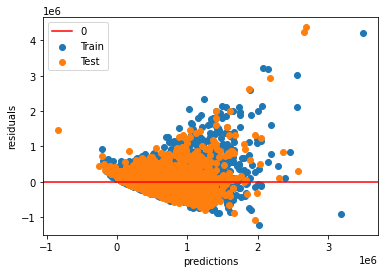

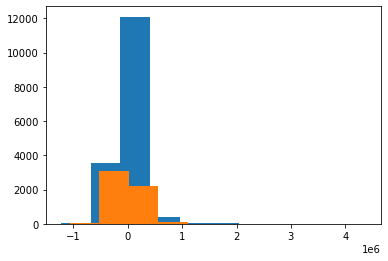

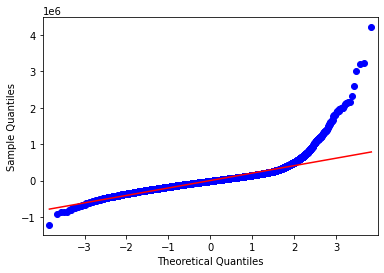

In [280]:

evaluate(y_train, Model_final_train_pred_log, y_test, Model_final_test_pred_log)




Based on the above graphs, our model is not fulfillign the ideal scenraio where, 
there should be a random scatter without identiable trned between the residuals and prediction plots.
Heteroskedasticity: residual spread is not differnt, were the graph shows spread localized at certain levels of the fitted value.